In [1]:
using JUDI, PyPlot, JLD

## 00_Loading Velocity data

In [7]:
path_vel = "../data/velocity/p_wave_marm.hdf5"
p_wave = load(path_vel, "data");

## 01_QC Velocity Data

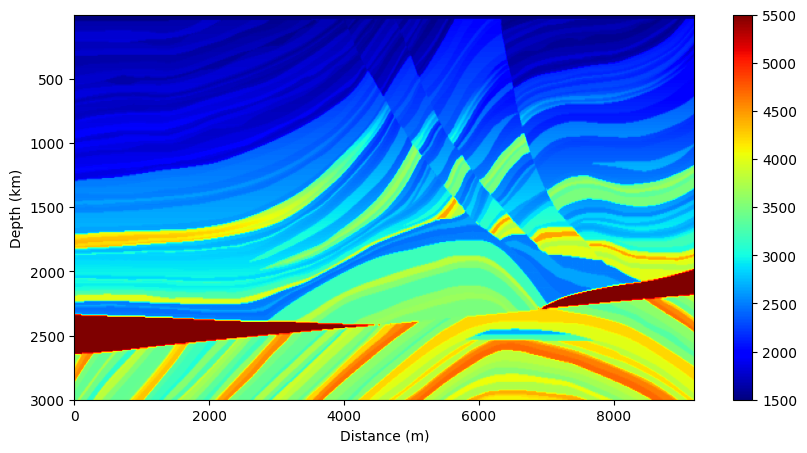

PyObject Text(24.0, 0.5, 'Depth (km)')

In [13]:
border = [0, size(p_wave')[2]*10, size(p_wave')[1]*10, 1]
figure(figsize=(10, 5))
imshow(p_wave', aspect="auto", cmap="jet", extent=border)
colorbar()
xlabel("Distance (m)")
ylabel("Depth (km)")

## 03 Make model data structure

For details of building model structure, please read the JUDI Model Structure documentation below: https://slimgroup.github.io/JUDI.jl/dev/data_structures/#Model-structure

```julia
Model(n, d, o, m; epsilon=nothing, delta=nothing, theta=nothing,
        phi=nothing, rho=nothing, qp=nothing, vs=nothing, nb=40)
```
where:
```
m: velocity model in slowness squared (s^2/km^2)

epsilon: Epsilon thomsen parameter ( between -1 and 1)

delta: Delta thomsen parameter ( between -1 and 1 and delta < epsilon)

theta: Anisotopy dip in radian

phi: Anisotropy azimuth in radian

rho: density (g / m^3)

qp: P-wave attenuation for visco-acoustic models

vs: S-wave velocity for elastic models.

nb: Number of ABC points
```

First of all, let's convert velocity(m/s) to slowness squared(s^2/km^2)

In [16]:
p_wave_in_km_s = p_wave .* 1e-3
slowness = 1 ./ (p_wave_in_km_s.^2 );

QC slowness by plotting

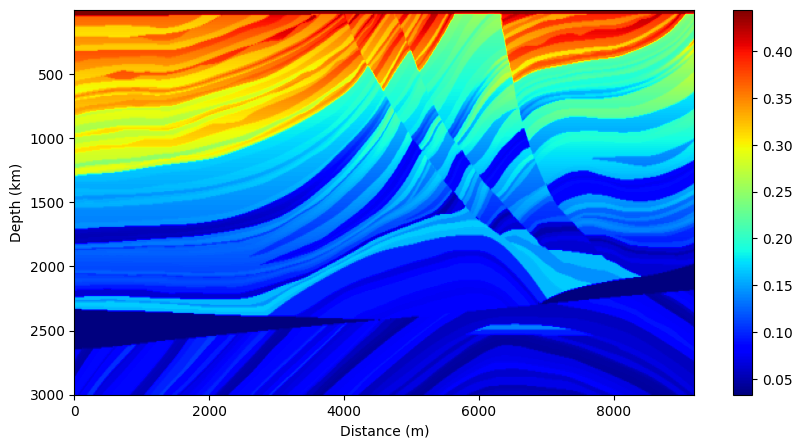

PyObject Text(24.0, 0.5, 'Depth (km)')

In [21]:
border = [0, size(slowness')[2]*10, size(slowness')[1]*10, 1]
figure(figsize=(10, 5))
imshow(slowness', aspect="auto", cmap="jet", extent=border)
colorbar()
xlabel("Distance (m)")
ylabel("Depth (km)")

Then, assign all the parameter in Model Structure

In [20]:
n = size(slowness)
d = (10, 10)
o = (0, 0)

model = Model(n, d, o, slowness)

Model (n=(920, 300), d=(10.0f0, 10.0f0), o=(0.0f0, 0.0f0)) with parameters (:m, :rho)

Save the velocity model to JLD file; it makes it easier to load later.

In [23]:
save("../data/velocity/model_p_wave_marm.jld", "data", model)